In [106]:
import numpy as np
import matplotlib.pyplot as plt
from gtda.diagrams import PersistenceEntropy
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import Amplitude
from gtda.homology._utils import _postprocess_diagrams
import pandas as pd


def generate_annular_points(num_points=200, inner_radius = 1.0,outer_radius = 1.1,phase=np.pi/4):
    theta = np.linspace(0, 2*np.pi, num_points)
    r = np.sqrt(np.random.uniform(inner_radius**2, outer_radius**2, num_points))
    x = r * np.cos(theta+phase)
    y = r * np.sin(theta+phase)
    return np.column_stack((x, y))


inner_radius = 1.0
outer_radius = 1.1
num_points_list = range(100,2600,200)

pe1=[]
pa1=[]

pe2=[]
pa2=[]

for num_points in num_points_list:

    print(f"num of points: {num_points}")

    points1 = generate_annular_points(num_points, inner_radius = 1.0,outer_radius = 1.1,phase=0)
    points2 = generate_annular_points(num_points, inner_radius = 0.8,outer_radius = 1.3,phase=np.pi/3)

    homology_dimensions = (0, 1)
    VR = VietorisRipsPersistence(homology_dimensions=homology_dimensions,max_edge_length=0.2)

    dg1=VR.fit_transform([points1])
    dg2=VR.fit_transform([points2])

    persistence_entropy = PersistenceEntropy()
    entropy1 = persistence_entropy.fit_transform(dg1)
    entropy2 = persistence_entropy.fit_transform(dg2)

    A=Amplitude(metric='wasserstein')

    amp1=A.fit_transform(dg1)
    amp2=A.fit_transform(dg2)

    pe1.append(list(entropy1[0]))
    pa1.append(list(amp1[0]))
    
    pe2.append(list(entropy2[0]))
    pa2.append(list(amp2[0]))
    

    # R.append(np.mean(list(ric.values())))
    # print(f'Persistent Entropy for {num_points} points: {entropy}')




num of points: 100
num of points: 300
num of points: 500
num of points: 700
num of points: 900
num of points: 1100
num of points: 1300
num of points: 1500
num of points: 1700
num of points: 1900
num of points: 2100
num of points: 2300
num of points: 2500


In [107]:
pe1=np.asarray(pe1)
pe2=np.asarray(pe2)
pa1=np.asarray(pa1)
pa2=np.asarray(pa2)


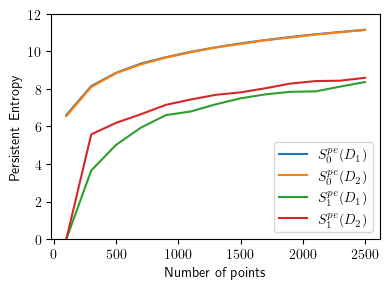

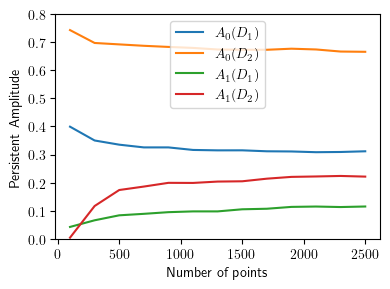

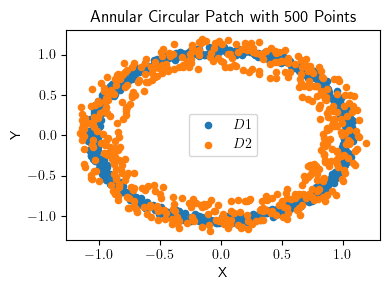

In [109]:
import matplotlib.pyplot as plt

x=num_points_list 

plt.rcParams.update(
{
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{slashed}',
})

plt.figure(figsize=(4, 3)) 
plt.plot(x,pe1[:,0])
plt.plot(x,pe2[:,0])
plt.plot(x,pe1[:,1])
plt.plot(x,pe2[:,1])
plt.ylim([0,12])
plt.legend([r'$S_0^{pe}(D_1)$',r'$S_0^{pe} (D_2)$',r'$S_1^{pe}(D_1)$',r'$S_1^{pe} (D_2)$'])
plt.ylabel(r'Persistent Entropy')

plt.xlabel(r'Number of points')
plt.tight_layout()
# plt.savefig(f'plots/demo1_pe.pdf',bbox_inches='tight')

plt.figure(figsize=(4, 3)) 
plt.plot(x,pa1[:,0])
plt.plot(x,pa2[:,0])
plt.plot(x,pa1[:,1])
plt.plot(x,pa2[:,1])
plt.ylim([0,0.8])
plt.legend([r'$A_0 (D_1)$',r'$A_0 (D_2)$',r'$A_1 (D_1)$',r'$A_1 (D_2)$'])
plt.ylabel(r'Persistent Amplitude')

plt.xlabel(r'Number of points')
plt.tight_layout()
# plt.savefig(f'plots/demo1_pa.pdf',bbox_inches='tight')

# plt.figure(figsize=(4, 3)) 
# plt.plot(x,R)
# plt.ylabel(r'Mean Forman Ricci Curvature')
# plt.ylim([-3,0])
# plt.xlabel(r'Number of points')
# plt.tight_layout()
# plt.savefig(f'plots/demo_ricci.pdf',bbox_inches='tight')

plt.figure(figsize=(4, 3)) 

points1 = generate_annular_points(500, 1.0,1.1,0)
plt.scatter(points1[:, 0], points1[:, 1], s=20)

points2 = generate_annular_points(500, 0.8,1.2,np.pi/3)
plt.scatter(points2[:, 0], points2[:, 1], s=20)

plt.legend([r'$D1$',r'$D2$'])
plt.title(f'Annular Circular Patch with {500} Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.savefig(f'plots/demo1_patch.pdf',bbox_inches='tight')



In [86]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse


def get_elliptic_pcd(center = (0.5, 0.5), width = 0.8,height = 0.2,angle = 60,N=500 ):

    # Generate random points within the bounding box of the ellipse
    np.random.seed(42)  # For reproducibility
    random_points = np.random.uniform(center[0] - width / 2, center[0] + width / 2, (10*N, 2))

    # Filter out points lying outside the ellipse
    inside_ellipse = random_points[((random_points[:, 0] - center[0]) * np.cos(np.radians(angle)) + 
                                    (random_points[:, 1] - center[1]) * np.sin(np.radians(angle))) ** 2 / (width / 2) ** 2 + \
                                ((random_points[:, 0] - center[0]) * np.sin(np.radians(angle)) - 
                                    (random_points[:, 1] - center[1]) * np.cos(np.radians(angle))) ** 2 / (height / 2) ** 2 <= 1]

    return inside_ellipse[:N]


In [92]:

pe1=[]
pa1=[]

pe2=[]
pa2=[]

for num_points in num_points_list:

    print(f"num of points: {num_points}")

    # points1 = generate_annular_points(num_points, inner_radius = 1.0,outer_radius = 1.1,phase=0)
    # points2 = generate_annular_points(num_points, inner_radius = 0.8,outer_radius = 1.3,phase=np.pi/3)

    points1 = get_elliptic_pcd(width = 0.8,height = 0.2,angle = 60,N=num_points)
    points2= get_elliptic_pcd(width = 0.8,height = 0.5,angle = 30 ,N=num_points)

    homology_dimensions = (0, 1)
    VR = VietorisRipsPersistence(homology_dimensions=homology_dimensions,max_edge_length=0.2)

    dg1=VR.fit_transform([points1])
    dg2=VR.fit_transform([points2])

    persistence_entropy = PersistenceEntropy()
    entropy1 = persistence_entropy.fit_transform(dg1)
    entropy2 = persistence_entropy.fit_transform(dg2)

    A=Amplitude(metric='wasserstein')

    amp1=A.fit_transform(dg1)
    amp2=A.fit_transform(dg2)

    pe1.append(list(entropy1[0]))
    pa1.append(list(amp1[0]))
    
    pe2.append(list(entropy2[0]))
    pa2.append(list(amp2[0]))
    

num of points: 100
num of points: 300
num of points: 500
num of points: 700
num of points: 900
num of points: 1100
num of points: 1300
num of points: 1500
num of points: 1700
num of points: 1900
num of points: 2100
num of points: 2300
num of points: 2500


In [94]:
pe1=np.asarray(pe1)
pe2=np.asarray(pe2)
pa1=np.asarray(pa1)
pa2=np.asarray(pa2)

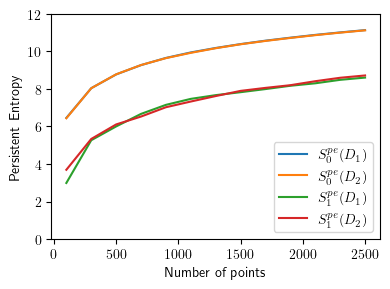

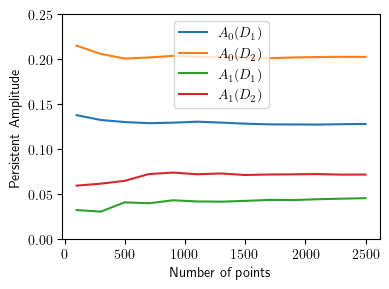

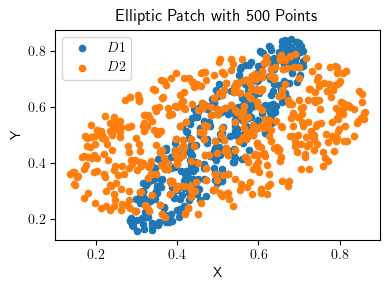

In [96]:
import matplotlib.pyplot as plt

x=num_points_list 

plt.rcParams.update(
{
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{slashed}',
})

plt.figure(figsize=(4, 3)) 
plt.plot(x,pe1[:,0])
plt.plot(x,pe2[:,0])
plt.plot(x,pe1[:,1])
plt.plot(x,pe2[:,1])

plt.ylim([0,12])
plt.legend([r'$S_0^{pe}(D_1)$',r'$S_0^{pe} (D_2)$',r'$S_1^{pe}(D_1)$',r'$S_1^{pe} (D_2)$'])
plt.ylabel(r'Persistent Entropy')

plt.xlabel(r'Number of points')
plt.tight_layout()
plt.savefig(f'plots/demo2_pe.pdf',bbox_inches='tight')

plt.figure(figsize=(4, 3)) 
plt.plot(x,pa1[:,0])
plt.plot(x,pa2[:,0])
plt.plot(x,pa1[:,1])
plt.plot(x,pa2[:,1])
plt.ylim([0,0.25])
plt.legend([r'$A_0 (D_1)$',r'$A_0 (D_2)$',r'$A_1 (D_1)$',r'$A_1 (D_2)$'])
plt.ylabel(r'Persistent Amplitude')

plt.xlabel(r'Number of points')
plt.tight_layout()
plt.savefig(f'plots/demo2_pa.pdf',bbox_inches='tight')

# plt.figure(figsize=(4, 3)) 
# plt.plot(x,R)
# plt.ylabel(r'Mean Forman Ricci Curvature')
# plt.ylim([-3,0])
# plt.xlabel(r'Number of points')
# plt.tight_layout()
# plt.savefig(f'plots/demo_ricci.pdf',bbox_inches='tight')

plt.figure(figsize=(4, 3)) 


inside_ellipse1 = get_elliptic_pcd(width = 0.8,height = 0.2,angle = 60,N=500)
inside_ellipse2= get_elliptic_pcd(width = 0.8,height = 0.5,angle = 30 ,N=500)



points1 = inside_ellipse1
plt.scatter(points1[:, 0], points1[:, 1], s=20)

points2 = inside_ellipse2
plt.scatter(points2[:, 0], points2[:, 1], s=20)

plt.title(f'Elliptic Patch with {500} Points')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.legend([r'$D1$',r'$D2$'])
plt.savefig(f'plots/demo2_patch.pdf',bbox_inches='tight')

